# Step 0 - Loading the necessary libraries and setting them up

In [55]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

#  use the mpld3 library for enabling zooming within Jupyter's matplotlib charts. 
import mpld3
mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

#  only a maximum of two rows of pandas DataFrames should be displayed
pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 16)

# Step 1 - Data Collection

In [56]:
# parse_dates=True 是 pandas 库中 read_csv 函数的一个参数。
# 它表示在读取 CSV 文件时，将某一列中的数据解析为日期时间格式。如果设置为 True，pandas 会自动尝试把所有列都解析为日期时间格式；如果设置为列名的列表，则只有列表中的列会被解析为日期时间格式。
A = pd.read_csv('A.csv', parse_dates=True, index_col=0)
A

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000


In [57]:
B = pd.read_csv('B.csv', parse_dates=True, index_col=0); 
B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3092080000
...,...,...,...,...,...,...
2020-05-14,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5641920000


In [58]:
C = pd.read_csv('C.csv', parse_dates=True, index_col=0); 
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.46,13.090000,12.350000,12.380000,12.380000,0
...,...,...,...,...,...,...
2020-05-14,35.16,39.279999,32.330002,32.610001,32.610001,0


# Step 2 - Data wrangling/munging

In [59]:
# A.join(B, how='outer', lsuffix='_A', sort=True):
#   A 和 B 是两个要合并的 Pandas DataFrame。
#   how='outer'：指定进行外连接，返回两个 DataFrame 的所有行。
#   lsuffix='_A'：给 DataFrame A 的列名添加后缀 '_A'，以区分合并结果中的来源。
#   sort=True：按索引对结果进行排序。
#   结果是一个新的 DataFrame，表示 A 和 B 的合并结果。

# .join(C, how='outer', lsuffix='_B', rsuffix='_C', sort=True):
#   将上一步得到的 DataFrame 与另一个 DataFrame C 进行合并。
#   how='outer'：再次指定进行外连接。
#   lsuffix='_B'：给上一步结果中的列名添加后缀 '_B'，以区分这些列来自前两个 DataFrame。
#   rsuffix='_C'：给 DataFrame C 的列名添加后缀 '_C'，以区分这些列来自 DataFrame C。
#   sort=True：最后按索引对结果进行排序。
merged_df = A.join(B, how='outer', lsuffix='_A', sort=True).join(C, how='outer', lsuffix='_B', rsuffix='_C', sort=True)

In [60]:
merged_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,...,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,...,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,...,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


# Step 3 - Data cleaning

In [61]:
# 整个代码的含义是选择 merged_df 中所有值都为 NaN 的行。
# merged_df.isnull().all(axis=1): 这部分代码对每一行进行操作，使用 .all(axis=1) 方法，如果一行中的所有元素都是 True（即都是 NaN），则返回 True，否则返回 False。这样得到的是一个布尔 Series，表示每一行是否全为 NaN。
merged_df[merged_df.isnull().all(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,...,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,


In [63]:
# 让我们找出有多少行至少有一个字段缺少或者是NaN
merged_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

148

In [20]:
valid_close_df = merged_df.dropna(subset=['Close_A', 'Close_B', 'Close_C'], how='any')

In [21]:
valid_close_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

0

In [22]:
valid_close_df

,Open_A,High_A,Low_A,...,Close_C,Adj Close_C,Volume_C
Date,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,...,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,...,32.610001,32.610001,0.0


In [23]:
valid_close_df.isnull().any(axis=1).sum()

165

In [24]:
valid_close_df[valid_close_df.isnull().any(axis=1)]

,Open_A,High_A,Low_A,...,Close_C,Adj Close_C,Volume_C
Date,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,...,12.730000,12.730000,0.0
...,...,...,...,...,...,...,...
2020-05-01,24120.779297,24120.779297,23645.300781,...,37.189999,37.189999,0.0


In [25]:
valid_close_complete = valid_close_df.fillna(method='backfill')

In [26]:
valid_close_complete.isnull().any(axis=1).sum()

0

# Step 4 - Obtaining Descriptive Statistics

In [27]:
pd.set_option('display.max_rows', None)
valid_close_complete.describe()

,Open_A,High_A,Low_A,...,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,...,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,...,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,...,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,...,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,...,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,...,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,...,82.690002,82.690002,0.0


In [28]:
pd.set_option('display.max_rows', 2)

In [29]:
prices_only = valid_close_complete.drop(['Volume_A', 'Volume_B', 'Volume_C'], axis=1)

In [30]:
prices_only

,Open_A,High_A,Low_A,...,Low_C,Close_C,Adj Close_C
Date,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,...,12.350000,12.380000,12.380000
...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,...,32.330002,32.610001,32.610001


# Step 5 - Visual Inspection of the Data

<AxesSubplot:xlabel='Date'>

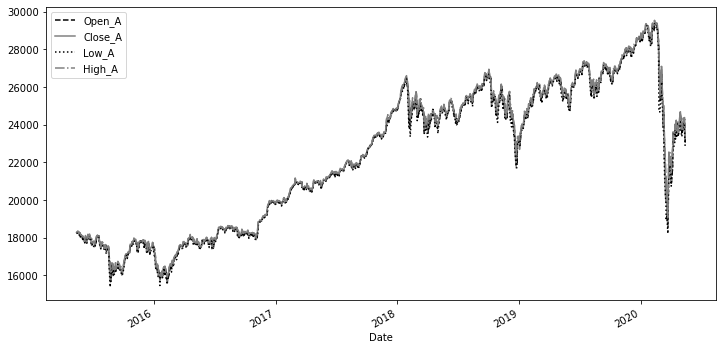

In [31]:
valid_close_complete['Open_A'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_A')
valid_close_complete['Close_A'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_A')
valid_close_complete['Low_A'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_A')
valid_close_complete['High_A'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_A')

<AxesSubplot:xlabel='Date'>

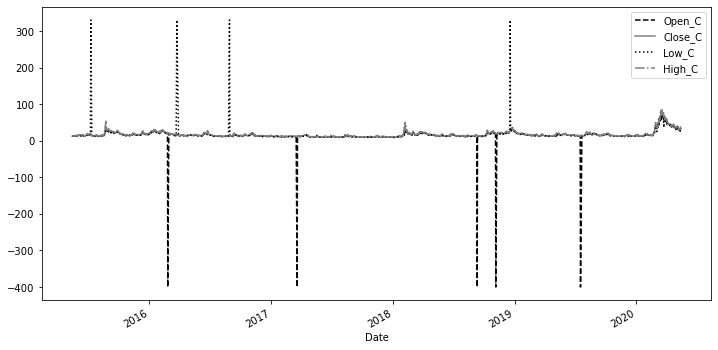

In [32]:
valid_close_complete['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
valid_close_complete['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
valid_close_complete['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
valid_close_complete['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

# Step 6 - Data Cleaning

In [33]:
no_outlier_prices = prices_only[(np.abs(stats.zscore(prices_only)) < 6).all(axis=1)]

<AxesSubplot:xlabel='Date'>

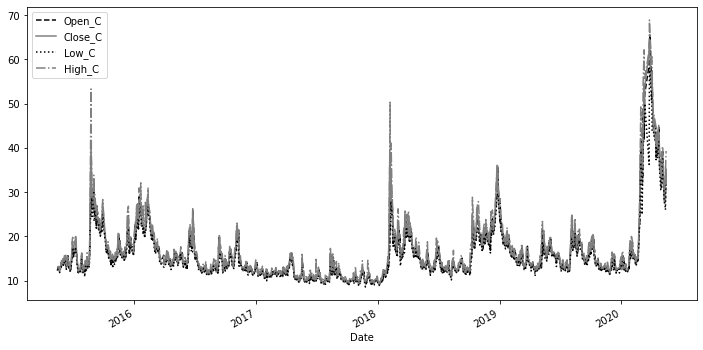

In [34]:
no_outlier_prices['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
no_outlier_prices['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
no_outlier_prices['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
no_outlier_prices['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

In [35]:
pd.set_option('display.max_rows', None)
no_outlier_prices[['Open_C', 'Close_C', 'Low_C', 'High_C']].describe()

,Open_C,Close_C,Low_C,High_C
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,16.147571,16.072648,15.223635,17.214539
std,6.764147,6.773569,5.995822,7.588690
min,9.010000,9.140000,8.560000,9.310000
25%,12.420000,12.285000,11.865000,12.890000
50%,14.160000,14.060000,13.440000,14.940000
75%,17.625000,17.500000,16.550000,18.929999
max,65.669998,63.950001,58.029999,68.860001


In [36]:
pd.set_option('display.max_rows', 5)

# Step 7 - Advanced Visualization Techniques

In [37]:
close_prices = no_outlier_prices[['Close_A', 'Close_B', 'Close_C']]

In [38]:
delta_close_prices = (close_prices.shift(-1) - close_prices).fillna(0)
delta_close_prices.columns = ['Delta_Close_A', 'Delta_Close_B', 'Delta_Close_C']

In [39]:
delta_close_prices

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Date,,,
2015-05-15,26.320312,6.469971,0.350000
2015-05-18,13.509766,-1.369873,0.120000
...,...,...,...
2020-05-13,377.369141,32.500000,-2.669998
2020-05-14,0.000000,0.000000,0.000000


In [40]:
pd.set_option('display.max_rows', None)

In [41]:
delta_close_prices.describe()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
count,1095.000000,1095.000000,1095.000000
mean,4.888383,0.666457,0.018475
std,268.137091,29.218995,1.938761
min,-2848.310547,-294.049805,-9.120001
25%,-70.894532,-7.140076,-0.760000
50%,15.539063,1.770020,-0.080000
75%,113.290039,12.255005,0.540001
max,1351.619141,154.510009,20.010001


<AxesSubplot:ylabel='Frequency'>

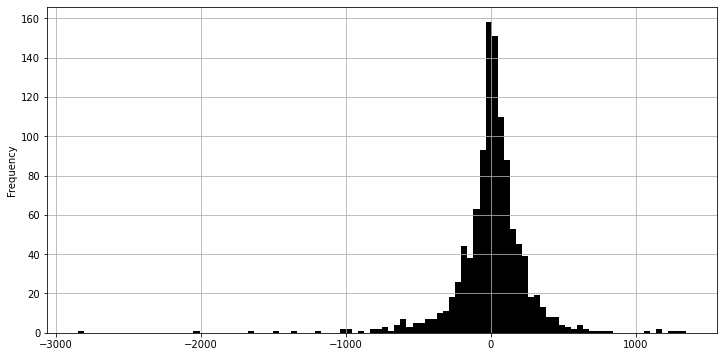

In [42]:
delta_close_prices['Delta_Close_A'].plot(kind='hist', bins=100, figsize=(12,6), color='black', grid=True)

<AxesSubplot:>

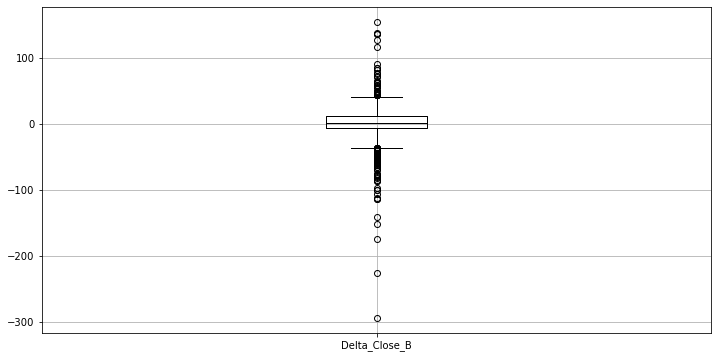

In [43]:
delta_close_prices['Delta_Close_B'].plot(kind='box', figsize=(12,6), color='black', grid=True)

array([[<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_A'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_B'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_C'>]],
      dtype=object)

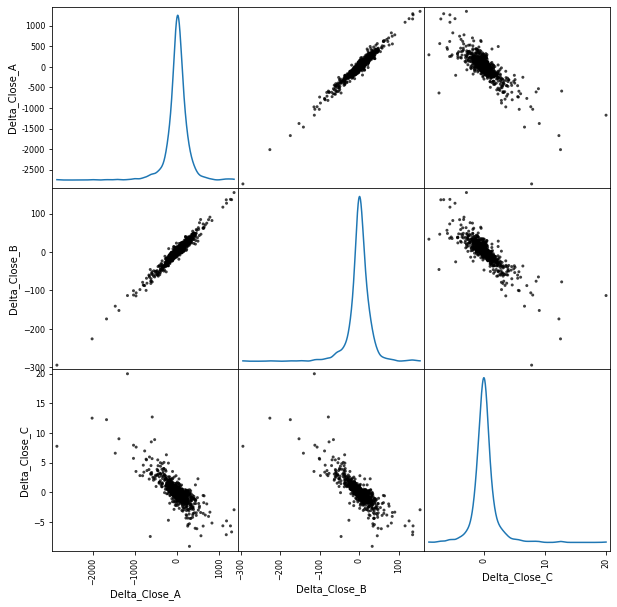

In [44]:
pd.plotting.scatter_matrix(delta_close_prices, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [45]:
delta_close_prices.corr()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Delta_Close_A,1.000000,0.976104,-0.785566
Delta_Close_B,0.976104,1.000000,-0.817788
Delta_Close_C,-0.785566,-0.817788,1.000000


<AxesSubplot:>

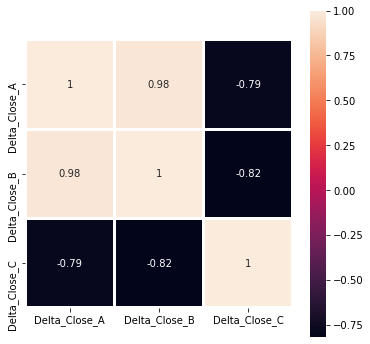

In [46]:
plt.figure(figsize=(6,6))
sn.heatmap(delta_close_prices.corr(), annot=True, square=True, linewidths=2)

# Special Python Libraries for EDA

In [47]:
import dtale
dtale.show(valid_close_df, ignore_duplicate=True)